In [22]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import seaborn as sns
from matplotlib import pyplot as plt
from typing import Union, List
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

%matplotlib inline

In [23]:
# load training and test data from the file
df = pd.read_csv("data.csv")
df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


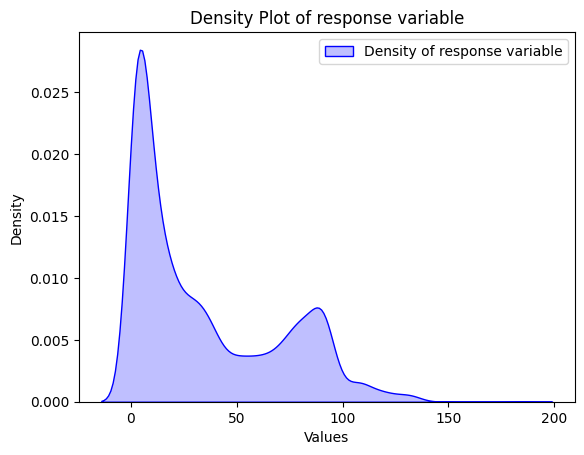

In [24]:
# Density plot for response variable
sns.kdeplot(df.critical_temp, fill=True, color="blue", label="Density of response variable")
plt.title('Density Plot of response variable')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show()

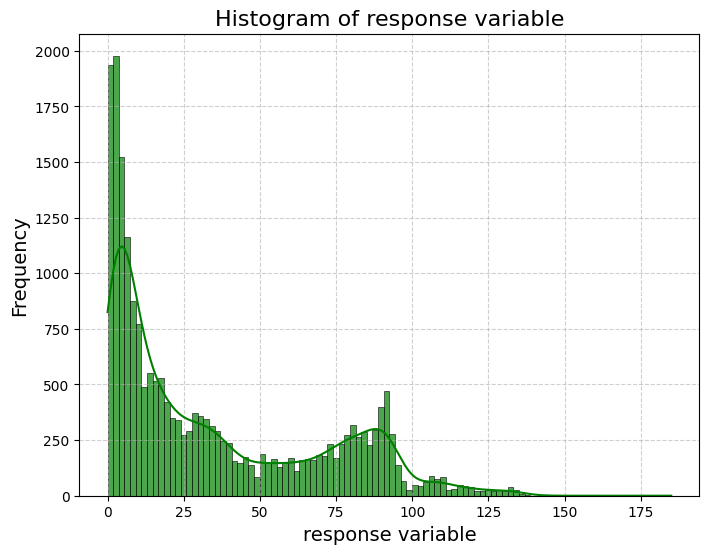

In [25]:
# Histogram of response variable
plt.figure(figsize=(8, 6))
sns.histplot(df.critical_temp, kde=True, color='green', alpha=0.7, bins=100)
plt.title("Histogram of response variable", fontsize=16)
plt.xlabel("response variable", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
# Assuming the last column is the target variable
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # The last column is the target

# Split the data into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (17010, 81) (17010,)
Testing set shape: (4253, 81) (4253,)


In [7]:
import statsmodels.api as sm

# Add a constant to the features (required for statsmodels OLS)
X_train = sm.add_constant(X_train)

# Fit the OLS model
model = sm.OLS(y_train, X_train)
results = model.fit()

# Display the summary of the OLS model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          critical_temp   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     585.1
Date:                Sat, 15 Mar 2025   Prob (F-statistic):               0.00
Time:                        20:35:31   Log-Likelihood:                -72932.
No. Observations:               17010   AIC:                         1.460e+05
Df Residuals:                   16928   BIC:                         1.467e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [8]:
# Add a constant to the test features
X_test = sm.add_constant(X_test)

# Predict on the test set
y_pred = results.predict(X_test)

# Evaluate the model (e.g., using Mean Squared Error)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)
# R-squared
r_squared = results.rsquared
print(f"R-squared on train set: {r_squared}")


# Calculate the R-squared on the test data
ss_res = np.sum((y_test - y_pred) ** 2)  # Residual Sum of Squares
ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)  # Total Sum of Squares
r_squared_test = 1 - (ss_res / ss_tot)

print("R-squared on Test Set:", r_squared_test)


Mean Squared Error on Test Set: 302.0075125500934
R-squared on train set: 0.7368358642267052
R-squared on Test Set: 0.7376312737139306


In [23]:
# Calculate mean
mean_y = np.mean(y)
print(f"The mean of y is: {mean_y}")

The mean of y is: 34.42121913535249


Bootstraping
----

In [51]:
import numpy as np


# Number of bootstrap samples
B = 5000
bootstrap_means = []

# Bootstrap resampling
for _ in range(B):
    resampled_data = np.random.choice(y, size=len(y), replace=True)
    bootstrap_means.append(np.mean(resampled_data))

# 95% confidence interval
Lower_bound = np.percentile(bootstrap_means, 2.5)
Upper_bound = np.percentile(bootstrap_means, 97.5)

print(f"95% Confidence Interval: [{Lower_bound}, {Upper_bound}]")


95% Confidence Interval: [33.9434083914664, 34.88715009026242]


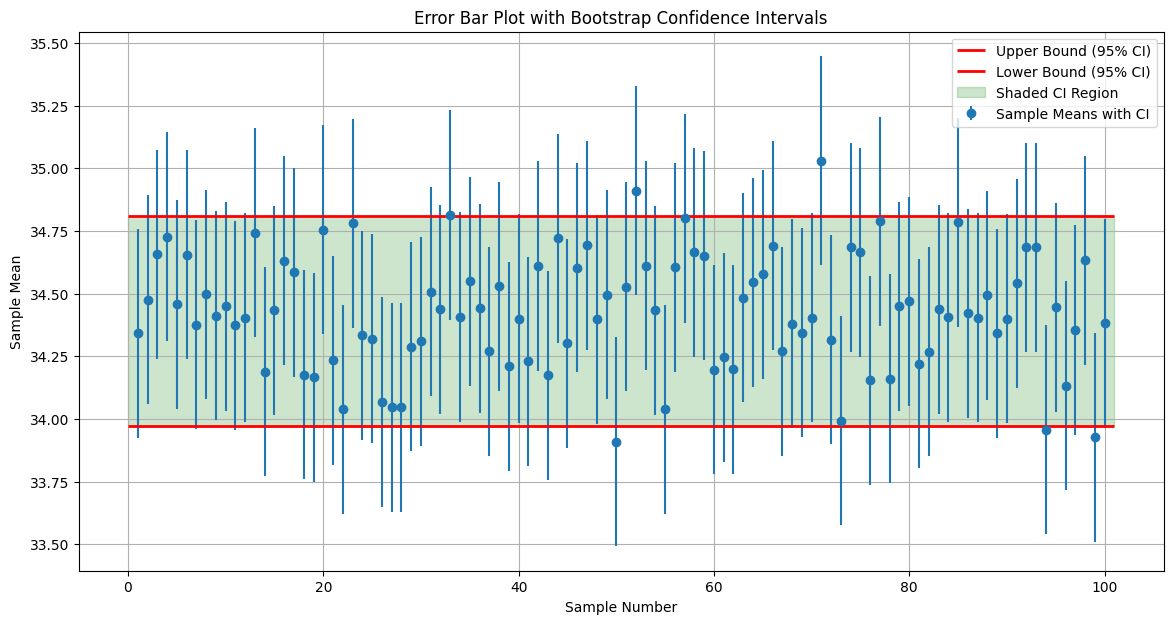

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

y = df.iloc[:, -1]
mean_y = np.mean(y)

# Number of bootstrap samples
B = 100
bootstrap_means = []

# Bootstrap resampling
for _ in range(B):
    resampled_data = np.random.choice(y, size=len(y), replace=True)
    bootstrap_means.append(np.mean(resampled_data))

# 95% confidence intervals for each sample
lower_bounds = [np.percentile(bootstrap_means, 2.5) for _ in range(B)]
upper_bounds = [np.percentile(bootstrap_means, 97.5) for _ in range(B)]

# Create data for plotting
sample_means = bootstrap_means  # Mean values for each sample
yerr = [(top - bot) / 2 for bot, top in zip(lower_bounds, upper_bounds)]
x = np.arange(1, B + 1)  # Create X-axis values for each bootstrap sample

# Define the overall lower and upper bounds
Lower_bound = np.percentile(bootstrap_means, 2.5)
Upper_bound = np.percentile(bootstrap_means, 97.5)

# Plot setup
plt.figure(figsize=(14, 7))
plt.errorbar(x=x, 
             y=sample_means, 
             yerr=yerr, 
             fmt='o', 
             label="Sample Means with CI")

# Add horizontal lines
plt.hlines(y=Upper_bound, 
           xmin=0, 
           xmax=B + 1, 
           linewidth=2.0, 
           color="red", 
           label="Upper Bound (95% CI)")
plt.hlines(y=Lower_bound, 
           xmin=0, 
           xmax=B + 1, 
           linewidth=2.0, 
           color="red", 
           label="Lower Bound (95% CI)")

# Shade between the lines
plt.fill_between(x=[0, B + 1], 
                 y1=Lower_bound, 
                 y2=Upper_bound, 
                 color="green", 
                 alpha=0.2, 
                 label="Shaded CI Region")

# Add labels, legend, and grid
plt.xlabel("Sample Number")
plt.ylabel("Sample Mean")
plt.title("Error Bar Plot with Bootstrap Confidence Intervals")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


Bayesian Method
----

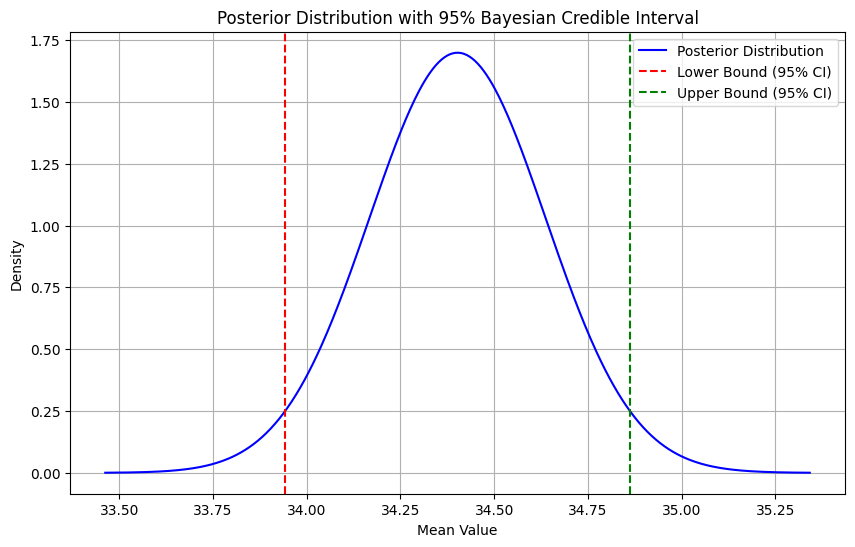

95% Bayesian Credible Interval: [33.94, 34.86]


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Example data (replace y with your actual data)
y = df.iloc[:, -1]  # Use the last column of your DataFrame as the data
n = len(y)
mean_y = np.mean(y)
std_y = np.std(y, ddof=1)

# Bayesian parameters (Normal prior)
prior_mean = 0  # Prior mean (e.g., non-informative prior centered at 0)
prior_std = 10  # Prior standard deviation (e.g., large value for non-informative prior)

# Posterior parameters (Normal likelihood + Normal prior -> Normal posterior)
posterior_mean = (prior_mean / prior_std**2 + n * mean_y / std_y**2) / (1 / prior_std**2 + n / std_y**2)
posterior_std = np.sqrt(1 / (1 / prior_std**2 + n / std_y**2))

# 95% Credible Interval
ci_lower, ci_upper = posterior_mean - 1.96 * posterior_std, posterior_mean + 1.96 * posterior_std

# Plot the posterior distribution
x_vals = np.linspace(posterior_mean - 4 * posterior_std, posterior_mean + 4 * posterior_std, 500)
posterior_pdf = norm.pdf(x_vals, loc=posterior_mean, scale=posterior_std)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, posterior_pdf, label="Posterior Distribution", color="blue")
plt.axvline(ci_lower, color="red", linestyle="--", label="Lower Bound (95% CI)")
plt.axvline(ci_upper, color="green", linestyle="--", label="Upper Bound (95% CI)")

# Add details to the plot
plt.title("Posterior Distribution with 95% Bayesian Credible Interval")
plt.xlabel("Mean Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

print(f"95% Bayesian Credible Interval: [{ci_lower:.2f}, {ci_upper:.2f}]")


Gibbs_sampling
----

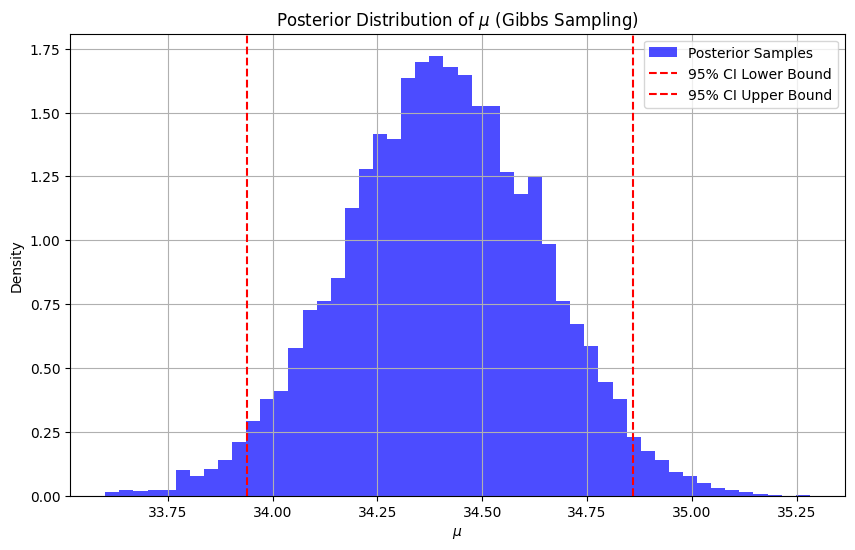

95% Bayesian Credible Interval: [33.94, 34.86]


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invgamma, norm

# Example data (replace y with your actual data)
y = df.iloc[:, -1].values  # Use the last column of your DataFrame as the data
n = len(y)

# Hyperparameters
mu_prior_mean = 0
mu_prior_var = 100  # Non-informative prior
alpha_prior = 1
beta_prior = 1

# Gibbs Sampling
def gibbs_sampling(data, n_samples=5000):
    samples_mu = []
    samples_sigma2 = []
    
    # Initial values
    mu = np.mean(data)
    sigma2 = np.var(data)
    
    for _ in range(n_samples):
        # Sample mu given sigma^2 and data
        mu_var = 1 / (n / sigma2 + 1 / mu_prior_var)
        mu_mean = mu_var * (np.sum(data) / sigma2 + mu_prior_mean / mu_prior_var)
        mu = norm.rvs(loc=mu_mean, scale=np.sqrt(mu_var))
        samples_mu.append(mu)
        
        # Sample sigma^2 given mu and data
        residuals = np.sum((data - mu) ** 2)
        alpha_post = alpha_prior + n / 2
        beta_post = beta_prior + residuals / 2
        sigma2 = invgamma.rvs(a=alpha_post, scale=beta_post)
        samples_sigma2.append(sigma2)
    
    return np.array(samples_mu), np.array(samples_sigma2)

# Run Gibbs Sampling
n_samples = 10000
mu_samples, sigma2_samples = gibbs_sampling(y, n_samples=n_samples)

# Burn-in and thinning
n_burn = 1000
mu_samples = mu_samples[n_burn:]
sigma2_samples = sigma2_samples[n_burn:]

# Compute 95% credible interval for mu
ci_lower, ci_upper = np.percentile(mu_samples, [2.5, 97.5])

# Plot the posterior distribution of mu
plt.figure(figsize=(10, 6))
plt.hist(mu_samples, bins=50, density=True, color="blue", alpha=0.7, label="Posterior Samples")
plt.axvline(ci_lower, color="red", linestyle="--", label="95% CI Lower Bound")
plt.axvline(ci_upper, color="red", linestyle="--", label="95% CI Upper Bound")

# Add labels and legend
plt.title("Posterior Distribution of $\mu$ (Gibbs Sampling)")
plt.xlabel("$\mu$")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

# Print results
print(f"95% Bayesian Credible Interval: [{ci_lower:.2f}, {ci_upper:.2f}]")


Metropolis_hastings
----

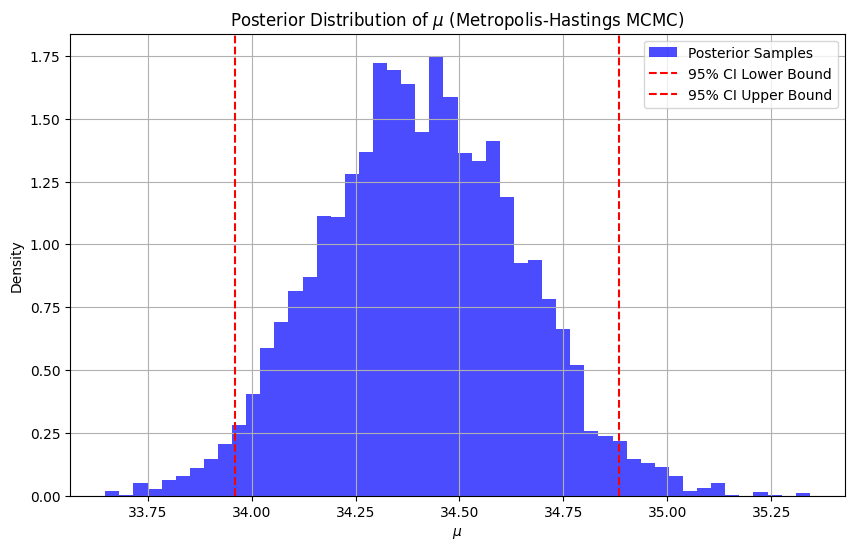

95% Bayesian Credible Interval: [33.96, 34.88]


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, invgamma

# Example data (replace y with your actual data)
y = df.iloc[:, -1].values  # Use the last column of your DataFrame as the data
n = len(y)

# Hyperparameters
mu_prior_mean = 0
mu_prior_var = 100  # Non-informative prior
alpha_prior = 1
beta_prior = 1

# Posterior functions
def log_posterior(mu, sigma2, data):
    # Log-prior for mu
    log_prior_mu = norm.logpdf(mu, loc=mu_prior_mean, scale=np.sqrt(mu_prior_var))
    # Log-prior for sigma^2
    log_prior_sigma2 = invgamma.logpdf(sigma2, a=alpha_prior, scale=beta_prior)
    # Log-likelihood
    log_likelihood = np.sum(norm.logpdf(data, loc=mu, scale=np.sqrt(sigma2)))
    return log_prior_mu + log_prior_sigma2 + log_likelihood

# Metropolis-Hastings
def metropolis_hastings(data, n_samples=5000, proposal_width_mu=0.5, proposal_width_sigma2=0.1):
    samples = []
    # Initial values
    current_mu = np.mean(data)
    current_sigma2 = np.var(data)
    current_log_posterior = log_posterior(current_mu, current_sigma2, data)
    
    for _ in range(n_samples):
        # Propose new values
        proposed_mu = np.random.normal(current_mu, proposal_width_mu)
        proposed_sigma2 = np.abs(np.random.normal(current_sigma2, proposal_width_sigma2))
        
        # Compute the new posterior
        proposed_log_posterior = log_posterior(proposed_mu, proposed_sigma2, data)
        
        # Acceptance probability
        acceptance_ratio = np.exp(proposed_log_posterior - current_log_posterior)
        
        if np.random.rand() < acceptance_ratio:
            current_mu = proposed_mu
            current_sigma2 = proposed_sigma2
            current_log_posterior = proposed_log_posterior
        
        # Store the sample
        samples.append((current_mu, current_sigma2))
    
    return np.array(samples)

# Run Metropolis-Hastings
n_samples = 10000
samples = metropolis_hastings(y, n_samples=n_samples)

# Extract mu and sigma^2 samples
mu_samples = samples[:, 0]
sigma2_samples = samples[:, 1]

# Burn-in and thinning
n_burn = 1000
mu_samples = mu_samples[n_burn:]
sigma2_samples = sigma2_samples[n_burn:]

# Compute 95% credible interval for mu
ci_lower, ci_upper = np.percentile(mu_samples, [2.5, 97.5])

# Plot the posterior distribution of mu
plt.figure(figsize=(10, 6))
plt.hist(mu_samples, bins=50, density=True, color="blue", alpha=0.7, label="Posterior Samples")
plt.axvline(ci_lower, color="red", linestyle="--", label="95% CI Lower Bound")
plt.axvline(ci_upper, color="red", linestyle="--", label="95% CI Upper Bound")

# Add labels and legend
plt.title("Posterior Distribution of $\mu$ (Metropolis-Hastings MCMC)")
plt.xlabel("$\mu$")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

# Print results
print(f"95% Bayesian Credible Interval: [{ci_lower:.2f}, {ci_upper:.2f}]")


weighted MCMC
----

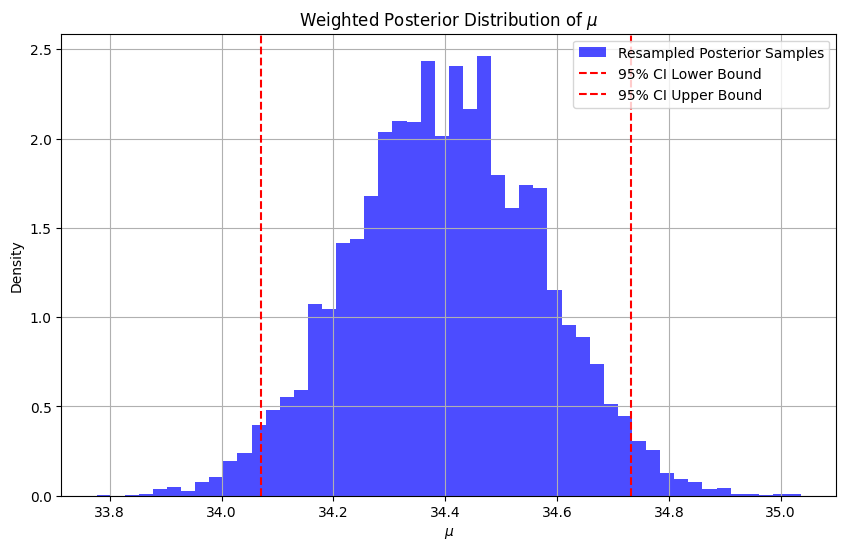

95% Weighted Bayesian Credible Interval: [34.07, 34.73]


In [35]:
def compute_weights(samples, data):
    weights = []
    for mu, sigma2 in samples:
        posterior = log_posterior(mu, sigma2, data)
        weights.append(posterior)
    weights = np.array(weights)
    weights -= np.max(weights)  # Stabilize by subtracting the max log-posterior
    return np.exp(weights)


# Compute weights for the MCMC samples
weights = compute_weights(samples, y)

# Normalize weights
weights /= np.sum(weights)

# Resample based on weights (if needed)
resampled_indices = np.random.choice(len(samples), size=len(samples), p=weights)
resampled_samples = samples[resampled_indices]

# Extract resampled mu and sigma^2
mu_samples_resampled = resampled_samples[:, 0]
sigma2_samples_resampled = resampled_samples[:, 1]

# Compute weighted credible interval for mu
ci_lower, ci_upper = np.percentile(mu_samples_resampled, [2.5, 97.5])


# Plot the posterior distribution of mu
plt.figure(figsize=(10, 6))
plt.hist(mu_samples_resampled, bins=50, density=True, color="blue", alpha=0.7, label="Resampled Posterior Samples")
plt.axvline(ci_lower, color="red", linestyle="--", label="95% CI Lower Bound")
plt.axvline(ci_upper, color="red", linestyle="--", label="95% CI Upper Bound")

# Add labels and legend
plt.title("Weighted Posterior Distribution of $\mu$")
plt.xlabel("$\mu$")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()



# Print results
print(f"95% Weighted Bayesian Credible Interval: [{ci_lower:.2f}, {ci_upper:.2f}]")


Laplace-Metropolis sampling
----

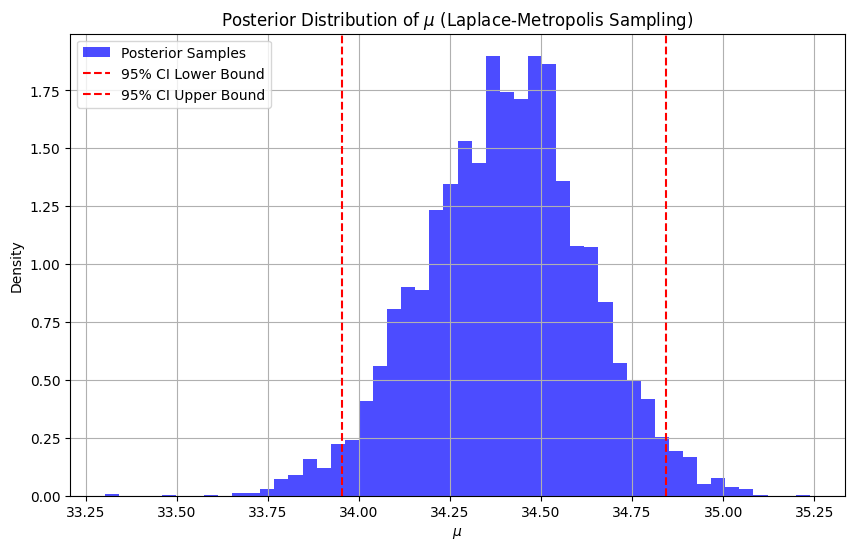

95% Bayesian Credible Interval: [33.95, 34.84]


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm, invgamma, multivariate_normal

# Example data (replace y with your actual data)
y = df.iloc[:, -1].values  # Use the last column of your DataFrame as the data
n = len(y)

# Hyperparameters
mu_prior_mean = 0
mu_prior_var = 100  # Non-informative prior
alpha_prior = 1
beta_prior = 1

# Log-posterior function
def log_posterior(params, data):
    mu, sigma2 = params
    if sigma2 <= 0:  # Ensure positive variance
        return -np.inf
    log_prior_mu = norm.logpdf(mu, loc=mu_prior_mean, scale=np.sqrt(mu_prior_var))
    log_prior_sigma2 = invgamma.logpdf(sigma2, a=alpha_prior, scale=beta_prior)
    log_likelihood = np.sum(norm.logpdf(data, loc=mu, scale=np.sqrt(sigma2)))
    return log_prior_mu + log_prior_sigma2 + log_likelihood

# Find the MAP estimate using optimization
def negative_log_posterior(params, data):
    return -log_posterior(params, data)

initial_guess = [np.mean(y), np.var(y)]
result = minimize(negative_log_posterior, initial_guess, args=(y,), method="L-BFGS-B", bounds=[(None, None), (1e-5, None)])
map_estimate = result.x  # MAP estimate of [mu, sigma2]

# Hessian approximation for covariance
hessian_inv = result.hess_inv.todense()  # Inverse Hessian at MAP

# Laplace approximation: Gaussian proposal centered at MAP
proposal_mean = map_estimate
proposal_cov = hessian_inv

# Metropolis algorithm
def metropolis_laplace(data, n_samples=10000):
    samples = []
    current_sample = proposal_mean
    current_log_post = log_posterior(current_sample, data)
    
    for _ in range(n_samples):
        # Propose new sample
        proposed_sample = multivariate_normal.rvs(mean=proposal_mean, cov=proposal_cov)
        
        # Compute log-posterior for the proposed sample
        proposed_log_post = log_posterior(proposed_sample, data)
        
        # Metropolis acceptance step
        acceptance_ratio = np.exp(proposed_log_post - current_log_post)
        if np.random.rand() < acceptance_ratio:
            current_sample = proposed_sample
            current_log_post = proposed_log_post
        
        samples.append(current_sample)
    
    return np.array(samples)

# Run Laplace-Metropolis sampling
n_samples = 10000
samples = metropolis_laplace(y, n_samples=n_samples)

# Extract mu and sigma^2 samples
mu_samples = samples[:, 0]
sigma2_samples = samples[:, 1]

# Compute 95% credible interval for mu
ci_lower, ci_upper = np.percentile(mu_samples, [2.5, 97.5])

# Plot the posterior distribution of mu
plt.figure(figsize=(10, 6))
plt.hist(mu_samples, bins=50, density=True, color="blue", alpha=0.7, label="Posterior Samples")
plt.axvline(ci_lower, color="red", linestyle="--", label="95% CI Lower Bound")
plt.axvline(ci_upper, color="red", linestyle="--", label="95% CI Upper Bound")

# Add labels and legend
plt.title("Posterior Distribution of $\mu$ (Laplace-Metropolis Sampling)")
plt.xlabel("$\mu$")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

# Print results
print(f"95% Bayesian Credible Interval: [{ci_lower:.2f}, {ci_upper:.2f}]")


Hamiltonian Monte Carlo (HMC)
----

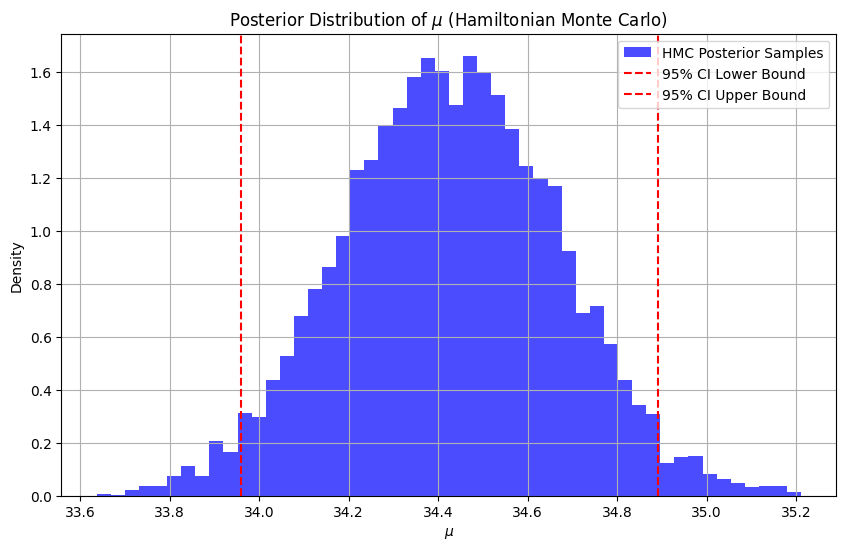

95% HMC Bayesian Credible Interval: [33.96, 34.89]


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, invgamma

# Example data (replace y with your actual data)
y = df.iloc[:, -1].values  # Use the last column of your DataFrame as the data
n = len(y)

# Hyperparameters
mu_prior_mean = 0
mu_prior_var = 100
alpha_prior = 1
beta_prior = 1

# Log-posterior function and gradient
def log_posterior(mu, sigma2, data):
    if sigma2 <= 0:
        return -np.inf
    log_prior_mu = norm.logpdf(mu, loc=mu_prior_mean, scale=np.sqrt(mu_prior_var))
    log_prior_sigma2 = invgamma.logpdf(sigma2, a=alpha_prior, scale=beta_prior)
    log_likelihood = np.sum(norm.logpdf(data, loc=mu, scale=np.sqrt(sigma2)))
    return log_prior_mu + log_prior_sigma2 + log_likelihood

def grad_log_posterior(mu, sigma2, data):
    d_mu = np.sum((data - mu) / sigma2) + (mu_prior_mean - mu) / mu_prior_var
    d_sigma2 = -0.5 * np.sum((data - mu) ** 2) / sigma2**2 + (alpha_prior - 1) / sigma2 - beta_prior / sigma2**2
    return np.array([d_mu, d_sigma2])

# HMC sampler
def hmc_sampler(data, n_samples=5000, step_size=0.01, n_leapfrog=10):
    samples = []
    current_mu = np.mean(data)
    current_sigma2 = np.var(data)
    
    for _ in range(n_samples):
        # Current position
        theta = np.array([current_mu, current_sigma2])
        
        # Sample momentum
        momentum = np.random.normal(0, 1, size=2)
        current_momentum = momentum.copy()
        
        # Leapfrog steps
        for _ in range(n_leapfrog):
            grad = grad_log_posterior(theta[0], theta[1], data)
            momentum += 0.5 * step_size * grad
            theta += step_size * momentum
            grad = grad_log_posterior(theta[0], theta[1], data)
            momentum += 0.5 * step_size * grad
        
        # Metropolis-Hastings correction
        current_log_post = log_posterior(current_mu, current_sigma2, data)
        proposed_log_post = log_posterior(theta[0], theta[1], data)
        current_kinetic = np.sum(current_momentum**2) / 2
        proposed_kinetic = np.sum(momentum**2) / 2
        acceptance_prob = np.exp(proposed_log_post - current_log_post + current_kinetic - proposed_kinetic)
        
        if np.random.rand() < acceptance_prob:
            current_mu, current_sigma2 = theta  # Accept the proposal
        
        samples.append([current_mu, current_sigma2])
    
    return np.array(samples)

# Run HMC sampling
n_samples = 10000
samples_hmc = hmc_sampler(y, n_samples=n_samples)

# Extract mu and sigma^2 samples
mu_samples_hmc = samples_hmc[:, 0]
sigma2_samples_hmc = samples_hmc[:, 1]

# Compute 95% credible interval for mu
ci_lower_hmc, ci_upper_hmc = np.percentile(mu_samples_hmc, [2.5, 97.5])

# Plot the posterior distribution of mu
plt.figure(figsize=(10, 6))
plt.hist(mu_samples_hmc, bins=50, density=True, color="blue", alpha=0.7, label="HMC Posterior Samples")
plt.axvline(ci_lower_hmc, color="red", linestyle="--", label="95% CI Lower Bound")
plt.axvline(ci_upper_hmc, color="red", linestyle="--", label="95% CI Upper Bound")

# Add labels and legend
plt.title("Posterior Distribution of $\mu$ (Hamiltonian Monte Carlo)")
plt.xlabel("$\mu$")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

# Print results
print(f"95% HMC Bayesian Credible Interval: [{ci_lower_hmc:.2f}, {ci_upper_hmc:.2f}]")


Highest Posterior Density (HPD)
-----

In [39]:
def hpd_interval(samples, alpha=0.05):
    """
    Compute the Highest Posterior Density (HPD) interval for a given set of samples.
    :param samples: 1D array of posterior samples
    :param alpha: Significance level (default is 0.05 for a 95% HPD interval)
    :return: (lower_bound, upper_bound)
    """
    sorted_samples = np.sort(samples)
    n_samples = len(samples)
    interval_index = int(np.floor((1 - alpha) * n_samples))
    intervals = [(sorted_samples[i], sorted_samples[i + interval_index]) for i in range(n_samples - interval_index)]
    hpd_interval = min(intervals, key=lambda x: x[1] - x[0])  # Find the shortest interval
    return hpd_interval

# Compute the HPD interval for mu using HMC samples
hpd_lower, hpd_upper = hpd_interval(mu_samples_hmc)

# Print the HPD interval
print(f"95% HPD Interval for $\mu$: [{hpd_lower:.2f}, {hpd_upper:.2f}]")


95% HPD Interval for $\mu$: [33.95, 34.88]
